# ***Predicting Proposal Success - 01 - Data Wrangling***

**File summary:** This file is the initial import and cleaning of the proposal dataset.


**Data Summary:**
This proposal dataset is the record of the 3,000+ proposals submitted by the Assessment & Restoration team at a large engineering firm between March 2019 to October 2024.

**Project Summary:** The final outcome of this project is to have identified the key elements of a proposal that can help us to predict whether a proposal will be won or lost

File Contact: Nicole Quevillon

# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import io

from google.colab import files
uploaded = files.upload()

for filename, file_content in uploaded.items():
   prop = pd.read_excel(io.BytesIO(file_content))

print(prop.shape)

Saving 1.1 DW Input 1. Proposals.xlsx to 1.1 DW Input 1. Proposals.xlsx
(3361, 20)


# **Basic Formatting**

In [ ]:
# Set the index to the column 'NO.' which is a unique ID
prop.set_index('NO.', drop = True, inplace = True)
print(prop.shape)
print(prop.head())

(3361, 19)
    PROPOSAL NUMBER  CLIENT  \
NO.                           
1           Q191859  TS1577   
2           Q202049  PC0003   
3           Q201827  MT1388   
4           Q200480  TC1885   
5           Q200559  TS2190   

                                   SITE ADDRESS & CITY SCOPE OF WORK  \
NO.                                                                    
1               5229 Dundas Street West, Etobicoke, ON    Update RFS   
2                         7440 Goreway Dr, Mississauga   Class 2 RFS   
3                     383 Adelaide Street, Toronto, ON    Update RFS   
4                      300 New Toronto Street, Toronto   Class 3 RFS   
5    190 Borough Drive & 25 Town Centre Court, Toronto   Class 2 RFS   

    RFP NUMBER           YEAR INCORPORATED NO. UNITS NO. STOREYS  \
NO.                                                                
1          NaN                         NaN       NaN         NaN   
2          NaN                        1970        39          

In [ ]:
#Drop unneeded columns with client identifying information
# The CLIENT column will be dropped in a later step after we extract the anonymized region information we need from it
prop = prop.drop(['SITE ADDRESS & CITY'], axis = 'columns')
print(prop.shape)

(3361, 18)


In [ ]:
#Let's look at what we're working with now
prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3361 entries, 1 to 3361
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROPOSAL NUMBER          3332 non-null   object        
 1   CLIENT                   3357 non-null   object        
 2   SCOPE OF WORK            3352 non-null   object        
 3   RFP NUMBER               127 non-null    object        
 4   YEAR INCORPORATED        3048 non-null   object        
 5   NO. UNITS                3091 non-null   object        
 6   NO. STOREYS              3012 non-null   object        
 7   NO. TOWNHOUSE BLOCKS     2926 non-null   object        
 8   PARKING GARAGE (LEVELS)  2946 non-null   object        
 9   COMPLETED PREVIOUS RFS   3344 non-null   object        
 10  REMINDER                 3351 non-null   object        
 11  FEE Breakdown            3249 non-null   object        
 12  Probable Fee             3230 non-null 

In [ ]:
# Convert YEAR INCORPORATED to pd.datetime
prop['YEAR INCORPORATED'] = pd.to_datetime(prop['YEAR INCORPORATED'], errors = 'coerce')
print(prop.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3361 entries, 1 to 3361
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROPOSAL NUMBER          3332 non-null   object        
 1   CLIENT                   3357 non-null   object        
 2   SCOPE OF WORK            3352 non-null   object        
 3   RFP NUMBER               127 non-null    object        
 4   YEAR INCORPORATED        1758 non-null   datetime64[ns]
 5   NO. UNITS                3091 non-null   object        
 6   NO. STOREYS              3012 non-null   object        
 7   NO. TOWNHOUSE BLOCKS     2926 non-null   object        
 8   PARKING GARAGE (LEVELS)  2946 non-null   object        
 9   COMPLETED PREVIOUS RFS   3344 non-null   object        
 10  REMINDER                 3351 non-null   object        
 11  FEE Breakdown            3249 non-null   object        
 12  Probable Fee             3230 non-null 

In [ ]:
#Rename 'Win / Loss / Unknown' for ease of use
prop.rename(columns = {'Win / Loss / Unknown': 'Outcome'}, inplace = True)
print(prop.columns)

Index(['PROPOSAL NUMBER', 'CLIENT', 'SCOPE OF WORK', 'RFP NUMBER',
       'YEAR INCORPORATED', 'NO. UNITS', 'NO. STOREYS', 'NO. TOWNHOUSE BLOCKS',
       'PARKING GARAGE (LEVELS)', 'COMPLETED PREVIOUS RFS', 'REMINDER',
       'FEE Breakdown', 'Probable Fee', 'ISSUED DATE', 'FOLLOW UP DUE DATE',
       'Outcome', 'COMMENTS', 'COMMENTS2'],
      dtype='object')


In [ ]:
prop.shape

(3361, 18)

# **Data Cleaning**

In [ ]:
# Explore the Outcomes column
pd.pivot_table(prop, values = 'Outcome', index = prop['Outcome'], columns = prop['ISSUED DATE'].dt.year, dropna=False, aggfunc = 'count')

ISSUED DATE,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,NaN
Outcome,,,,,,,
Loss,136.0,243.0,135.0,95.0,283.0,222.0,NaN
Unknown,NaN,NaN,151.0,245.0,52.0,76.0,NaN
WIN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Win,106.0,126.0,251.0,467.0,380.0,257.0,NaN
win,NaN,NaN,NaN,1.0,1.0,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# There are a few steps needed to clean this column:
print(prop.shape)

#Change all text to lowercase
prop['Outcome'] = prop['Outcome'].str.lower()

#Assume anything issued more than a year ago that is still unknown is a loss
prop['Outcome'] = np.where((prop['ISSUED DATE'] < '2023-10-01') & (prop['Outcome'] == 'unknown'), 'loss', prop['Outcome'])

#Anything still listed as unknown should be removed from the data as we will only be looking at wins & loses
prop = prop[prop['Outcome'] != 'unknown']

#remove any rows with nulls as these are proposal that were either not submitted or were in progress when the data was pulled
prop.dropna(subset=['Outcome'], inplace=True)
print(prop.shape)

(3361, 18)
(3152, 18)


<ipython-input-10-743fd2fa67e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop.dropna(subset=['Outcome'], inplace=True)


In [ ]:
#The Outcome column is now good to use as our binary classifier
pd.pivot_table(prop, values = 'Outcome', index = prop['Outcome'], columns = prop['ISSUED DATE'].dt.year, dropna=False, aggfunc = 'count')

ISSUED DATE,2019,2020,2021,2022,2023,2024
Outcome,,,,,,
loss,136,243,286,340,335,222
win,106,126,251,469,381,257


# **Creating Additional Features**

**Column with previous number of wins for that client**

The theory is that having previously done work for a client may make them more likely to win additional work from that client. This column will indicate the number of previous proposals won from that client

In [ ]:
#Add a column with the # of proposals won from that client prior to the current proposal
prop['prev_wins'] = 0

for index, row in prop.iterrows():
  current_c = row['CLIENT']
  current_d = row['ISSUED DATE']

  matching_rows = prop[(prop['CLIENT'] == current_c) & (prop['ISSUED DATE'] < current_d)]
  won_count = matching_rows['Outcome'].eq('win').sum()

  prop.loc[index, 'prev_wins'] = won_count

<ipython-input-12-18ffd9f5fe65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop['prev_wins'] = 0


In [ ]:
#Check values in new column
print(prop['prev_wins'].value_counts())

#This looks good, but there are some very high numbers in here. Need to dig into it a bit more

prev_wins
0     2315
1      449
2      131
4       60
3       49
6       22
5       15
10       8
8        8
9        8
40       7
15       7
43       5
7        5
51       4
56       4
48       4
24       3
11       3
42       3
20       2
37       2
46       2
36       2
39       2
22       2
38       2
59       1
54       1
55       1
65       1
58       1
50       1
61       1
62       1
63       1
64       1
49       1
30       1
47       1
41       1
45       1
60       1
35       1
34       1
33       1
32       1
31       1
29       1
27       1
44       1
28       1
23       1
14       1
66       1
Name: count, dtype: int64


In [ ]:
print(prop.loc[prop['prev_wins'] == 66])

#This 66 looks like it might actually be legitimate since it is for a major client

     PROPOSAL NUMBER    CLIENT SCOPE OF WORK RFP NUMBER YEAR INCORPORATED  \
NO.                                                                         
3297   PCC-253383-00  H&R REIT  Landscaping         NaN               NaT   

     NO. UNITS NO. STOREYS NO. TOWNHOUSE BLOCKS PARKING GARAGE (LEVELS)  \
NO.                                                                       
3297       NaN         NaN                  NaN                     NaN   

     COMPLETED PREVIOUS RFS REMINDER FEE Breakdown  Probable Fee ISSUED DATE  \
NO.                                                                            
3297                     No       No       $215/hr        1800.0  2024-09-11   

       FOLLOW UP DUE DATE Outcome COMMENTS            COMMENTS2  prev_wins  
NO.                                                                         
3297  2024-10-26 00:00:00     win      NaN  Jon's email Sept 11         66  


In [ ]:
#count of each outcome only including entries where CLIENT = 'H&R REIT'
print(prop.loc[(prop['CLIENT'] == 'H&R REIT') & (prop['Outcome'] == 'win')]['prev_wins'].value_counts())

#These numbers don't seem to make sense. Intuitively there should only be 1 per prev_win

prev_wins
6     8
15    5
43    4
48    3
24    3
51    3
3     2
20    2
56    2
0     1
54    1
41    1
42    1
47    1
59    1
58    1
55    1
38    1
61    1
62    1
63    1
64    1
65    1
40    1
36    1
60    1
29    1
2     1
5     1
14    1
22    1
23    1
28    1
27    1
30    1
37    1
31    1
32    1
33    1
34    1
35    1
39    1
1     1
66    1
Name: count, dtype: int64


In [ ]:
#It looks like there are bundles of proposals that are issued on the same day which is causing the duplicate prev_win count.
#This also explains the missing values in the prev_win count. 3 props with 48 prev wins, and next would register as 51 prev_wins
#No further changes are needed to adddress this situation as it is rare and our current counts are technically correct

print(prop.loc[prop['prev_wins'] == 48])

     PROPOSAL NUMBER    CLIENT SCOPE OF WORK RFP NUMBER YEAR INCORPORATED  \
NO.                                                                         
2786   PCC-250107-00  H&R REIT           PCA        NaN               NaT   
2787   PCC-250108-00  H&R REIT           PCA        NaN               NaT   
2788   PCC-250109-00  H&R REIT           PCA        NaN               NaT   
3026   PCC-251442-00   CAPREIT       Roofing        NaN               NaT   

                     NO. UNITS NO. STOREYS NO. TOWNHOUSE BLOCKS  \
NO.                                                               
2786   1 years old, 80,000 sf            -                    -   
2787  1 years old, 300,000 sf            -                    -   
2788  3 years old, 300,000 sf            -                    -   
3026                         -           -                    -   

     PARKING GARAGE (LEVELS) COMPLETED PREVIOUS RFS REMINDER  \
NO.                                                            
2786  

**Region Indicator**

A majority of the clients that this company works with are condo corporations. The naming of these condo corps is in a specific format that can be used to identify region.

Condo corp IDs are always in the format AA0000. The first two digits are letters that indicate in what region the incorpration was processed and is our best proxy for the region of the client.

In [ ]:
#We only want to keep the first two digits of the CLIENT column since it is an indication of region
prop['CLIENT'] = prop['CLIENT'].str[:2]
print(prop['CLIENT'].head(20))

NO.
1     TS
2     PC
3     MT
4     TC
5     TS
6     SC
7     TS
8     TS
9     OC
10    YR
11    MT
12    Ru
13    YR
14    YR
15    YR
16    YR
17    TS
18    SC
19    MT
20    MT
Name: CLIENT, dtype: object


In [ ]:
#Some additional cleaning will be needed on this column which will be done during EDA

**Townhouse Flag**

We will create a flag to indicate whether a proposal is for a townhouse complex using the NO. TOWNHOUSE BLOCKS column. This column is only used for townhouses

In [ ]:
#The NO. TOWNHOUSE BLOCKS column is used only for proposals related to townhouses
print(prop['NO. TOWNHOUSE BLOCKS'].unique())
prop['NO. TOWNHOUSE BLOCKS'].value_counts()

[nan '-' 2 '?' 5 'Single Dwellings' 3 11 7 1 4 '3 buildings' 8 13
 '6 TH blocks at 2 storey' 12 14 '56U in 14 quad blocks\n86units 9 blocks'
 10 6 51 35 'Detached' 'No Info in previous docs' 15 9 25 'Various Blocks'
 17 47 'Shared Facilities' 30 'Single & Semi-Detached Dwellings' 16
 'multiple' '40 townhouse' '2 single homes' '1 (4units)' '2\n4' 94 18
 '6 TH units' 24
 'd’habitation  Aile-Nord - 9 Townhouse/1 Apartment  \nHarvest Moon Co-op  - 5 Townhouse '
 39 '1 House' '1 block' '2 Blocks' '2 Blocks - 3 storey stacked townhouse'
 21 'Semi detached' 19 '50 Semi-Detached Buildings' 28 '`'
 '64 (1.8 acres)' '6 blocks' '8 x 3-storey buildings' '15 five-storey' 26
 '\nIndustrial \nIndustrial \nIndustrial \nCommercial\nCommercial\nCommercial\nCommercial'
 '20 Semi-Detached Buildings' '6x 2-storey blocks'
 '27 Single Family Homes' '51 Single Family Homes'
 '2 commercial buildings with  shared truck court' 'Snr Bldg & Townhouse'
 '2 apartment buildings\n7 townhouses' '3 Blocks /16 suites ea 

,count
NO. TOWNHOUSE BLOCKS,
-,2275
1,76
2,50
3,37
6,35
...,...
2 Blocks - 3 storey stacked townhouse,1
21,1
Semi detached,1


In [ ]:
# Create Townhouse Flag by assuming anything without a value or with the value '-' in the NO. TOWNHOUSE BLOCKS column is not a townhouse
prop['Townhouse_Flag'] = np.where((prop['NO. TOWNHOUSE BLOCKS'].isnull()) |\
                                  (prop['NO. TOWNHOUSE BLOCKS'] == '-'), 0, 1)
print(prop[['NO. TOWNHOUSE BLOCKS', 'Townhouse_Flag']].head(20))

    NO. TOWNHOUSE BLOCKS  Townhouse_Flag
NO.                                     
1                    NaN               0
2                    NaN               0
3                      -               0
4                    NaN               0
5                      -               0
6                    NaN               0
7                    NaN               0
8                      2               1
9                      ?               1
10                     5               1
11                     -               0
12                     -               0
13                     -               0
14                     -               0
15                     -               0
16                     -               0
17                   NaN               0
18                   NaN               0
19                     -               0
20                   NaN               0


**Number of Storeys**

The Number of Storeys column is a key inidicator of building size. The column needs significant cleaning though

In [ ]:
#Significant cleaning needed
print(prop['NO. STOREYS'].unique())

[nan 2 5 17 3 '-' 4 '2 & 4' 1 20 24 34 21 6 12 '5 HR building at 3 storey'
 39 '3bldg, 3storeys' '2 or 3' 9 '1+basement' 8 '2 Towers - 4 storey' 25
 'Tower 1 - 10\nTower 2 - 14' 22 '2 and 1' 14 35 10 'Multi' '4  and 3'
 '21 and 5' 23 54 32 31 7 29 ' 2 / 3' '7 and 8' ' 1 - 2 ' 15 33 43 '1 / 2'
 '.2 / 3' 30 18 47 27 26 38 37 ' 12 3-storey buildings' 16
 '2 3-storey buildings' 11 '6 x 3' 42 36 ' 25 & 12' '2 x 4' '2 x 3'
 '2 x 23' 13 45 28 40 '4 / 7' 19 '9 + TH' '13/9' '15 / 32' '14/49/14/39'
 '6\n6' '34/25' '2 x 12' 637 49 '2buildings  x 3 storeys' 75 '1 and 2' 41
 187 '7 x 2' '1 and 3' '2/3' '33/13/5' '12 + 8' '3/1'
 '27\n23\nconnectected by 3-storey podium' '11/29' '2 x 6' '19 + 12'
 '2 x12' '1 to 2' '32\n41' 46 '2 x4' 'Queen-18 & Sparks-6'
 'Queen-18 & Sparks-6 Parking Only' 'Queen-18' 'Queen-18 & Sparks-Hotels'
 '2 x 15' '17, 14, 12' 57 '2 10 Storeys' '2 buildings x 3'
 '2-storey commercial, 4-storey office tower' '4-storey Commercial'
 '2-storey front & 3storey back (jail)' '44\n45' 

In [ ]:
#We will be creating a cleaned version of the column that is numeric only
#There are some common repeating patterns in the text that we can use to grab the storey information

import re

def clean_storeys(value):
  #if null, set the cleaned value to null
  if pd.isnull(value):
    return np.nan

  #if it is only letters, set the cleaned value to null
  if isinstance(value, str) and value.isalpha():
    return np.nan

  #if it is only numeric, set the cleaned value to a copy of the original column
  if isinstance(value, (int, float, np.number)):
   return value

  #if there is a '## Storey' pattern, set the cleaned value to the digits found before 'storey'
  pattern = r'(\d+)[^\d]*storey(?:s)?'
  digits_before_storey = re.findall(pattern, str(value), flags=re.IGNORECASE)

  if digits_before_storey:
    return max(map(int, digits_before_storey))
  else:
    return np.nan

In [ ]:
prop['Cleaned_Storeys'] = prop['NO. STOREYS'].apply(clean_storeys)

In [ ]:
#Check the NO.STOREYS and Cleaned_Storeys columns where the word 'storey' appears in NO.STOREYS
prop[prop['NO. STOREYS'].str.contains('storey', case = False, na=False)]

# Catching #s before the word 'storey' seems to be working well

,PROPOSAL NUMBER,CLIENT,SCOPE OF WORK,RFP NUMBER,YEAR INCORPORATED,NO. UNITS,NO. STOREYS,NO. TOWNHOUSE BLOCKS,PARKING GARAGE (LEVELS),COMPLETED PREVIOUS RFS,...,FEE Breakdown,Probable Fee,ISSUED DATE,FOLLOW UP DUE DATE,Outcome,COMMENTS,COMMENTS2,prev_wins,Townhouse_Flag,Cleaned_Storeys
NO.,,,,,,,,,,,,,,,,,,,,,
59,Q200740,AC,Class 2 RFS,NaN,NaT,38 TH\n58 HR,5 HR building at 3 storey,6 TH blocks at 2 storey,-,Yes,...,3795,3795.0,2019-07-18,No Follow-up,win,Project Received,NaN,0,1,3.0
73,Q200685,SC,Class 2 RFS,NaN,2009-02-09,72,"3bldg, 3storeys",-,-,No,...,2995,2995.0,2019-07-26,No Follow-up,win,Project Received,NaN,0,0,3.0
99,Q201133,OC,Class 2 RFS,NaN,2013-11-22,66,2 Towers - 4 storey,-,1,No,...,3395,3395.0,2019-08-27,No Follow-up,loss,Did not receive,NaN,0,0,4.0
333,Q210060,YR,Class 2 RFS,NaN,2006-09-29,85,12 3-storey buildings,-,-,No,...,3295,3295.0,2020-04-09,No Follow-up,loss,Did not receive,NaN,0,0,3.0
337,Q210080,AC,Update RFS,NaN,1996-02-23,42,2 3-storey buildings,-,-,Yes,...,"C2 $3,995\nC3 $3,195",3195.0,2020-04-09,No Follow-up,win,Project Received,NaN,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,PCC-250767-00,Sv,Consult,NaN,NaT,318,2 Buildings (9 storeys),-,??,No,...,201765,201765.0,2024-03-07,No Follow-up,loss,Did not receive,Ebraam,0,0,9.0
3018,PCC-251379-00,H&,PCA,NaN,NaT,NaN,"2 storey front office, 1 storey warehouse",NaN,NaN,No,...,PCA - $3950\nReliance Letter $375,4325.0,2024-04-11,No Follow-up,win,Project Received,NaN,0,0,2.0
3044,PCC-251599-00,YR,Class 1 RFS,NaN,2023-09-21,4 Commercial,4 buildings x 1 Storey,-,-,No,...,2495,2495.0,2024-04-25,No Follow-up,win,Project Received,NaN,0,0,1.0


In [ ]:
#General comparison between NO. STOREY and Cleaned_Storey
print(prop[['NO. STOREYS', 'Cleaned_Storeys']].head(20))

#Grabbing digits working well too

    NO. STOREYS  Cleaned_Storeys
NO.                             
1           NaN              NaN
2             2              2.0
3             5              5.0
4           NaN              NaN
5            17             17.0
6           NaN              NaN
7           NaN              NaN
8             3              3.0
9             2              2.0
10            3              3.0
11            -              NaN
12            -              NaN
13          NaN              NaN
14          NaN              NaN
15          NaN              NaN
16          NaN              NaN
17          NaN              NaN
18          NaN              NaN
19            4              4.0
20          NaN              NaN


In [ ]:
#print rows where NO. STOREYS is not null and Cleaned_Storeys is null
print('#null cleaned_storeys:', len(prop[prop['Cleaned_Storeys'].isnull()]))
print('#null NO. STOREYS:', len(prop[prop['NO. STOREYS'].isnull()]))
print('# - NO. STOREYS:', len(prop[prop['NO. STOREYS']=='-']))

print(prop[prop['NO. STOREYS'].notnull() & prop['Cleaned_Storeys'].isnull()]['NO. STOREYS'].unique())
print(prop['Cleaned_Storeys'].value_counts())

#The remaining values are very messy and inconsistent. I think I've cleaned as much as is reasonable
#Cleaned_Storeys column results seem reasonable and null count is similar to the original column

#null cleaned_storeys: 2055
#null NO. STOREYS: 305
# - NO. STOREYS: 1605
['-' '2 & 4' '2 or 3' '1+basement' 'Tower 1 - 10\nTower 2 - 14' '2 and 1'
 'Multi' '4  and 3' '21 and 5' ' 2 / 3' '7 and 8' ' 1 - 2 ' '1 / 2'
 '.2 / 3' '6 x 3' ' 25 & 12' '2 x 4' '2 x 3' '2 x 23' '4 / 7' '9 + TH'
 '13/9' '15 / 32' '14/49/14/39' '6\n6' '34/25' '2 x 12' '1 and 2' '7 x 2'
 '1 and 3' '2/3' '33/13/5' '12 + 8' '3/1' '11/29' '2 x 6' '19 + 12'
 '2 x12' '1 to 2' '32\n41' '2 x4' 'Queen-18 & Sparks-6'
 'Queen-18 & Sparks-6 Parking Only' 'Queen-18' 'Queen-18 & Sparks-Hotels'
 '2 x 15' '17, 14, 12' '2 buildings x 3' '44\n45' '16 blocks'
 '10 Apartment\n2 Rec Building' '16\n195 HR units'
 '18 Davenport Rd - 16\n4455 Bathurst St - 14\n193 Wilson Ave - 5'
 '2 towers x24' '65 Bldgs' '6; 7; 3' '10-Buildings' '38 each (2 towers)'
 '35\n16' '5 (2 underground & 3 above ground)'
 'Bldg A & B - 20\nBldg C to F - 16' '15 (condo & commercial)'
 'Bldg A - 1\nBldg B & C - 2' '2buildings - 7 floors'
 '3+1 raised basement\n2+

**Commercial Flag**

We want to create a flag to indicate whether a proposal is for a commercial property. There is no dedicated column for commercial information, but it is generally indicated via a 'comm', 'commercial', 'industrial' or 'ind' text marker in the 'NO UNITS' or 'NO STOREYS' columns

In [ ]:
#Create a commercial flag by assuming a property is commercial if the word 'com' or 'ind' appears in the columns: NO. UNITS, NO. STOREYS or NO. TOWNHOUSE BLOCKS
prop['Commercial_Flag'] = np.where((prop['NO. UNITS'].str.contains('com', case = False)) |\
                                   (prop['NO. UNITS'].str.contains('ind', case = False)) |\
                                   (prop['NO. STOREYS'].str.contains('com', case = False)) |\
                                   (prop['NO. STOREYS'].str.contains('ind', case = False)) |\
                                   (prop['NO. TOWNHOUSE BLOCKS'].str.contains('com', case = False))|\
                                   (prop['NO. TOWNHOUSE BLOCKS'].str.contains('ind', case = False)), 1,0)

In [ ]:
print(prop[prop['Commercial_Flag']==1])

     PROPOSAL NUMBER CLIENT     SCOPE OF WORK RFP NUMBER  \
NO.                                                        
48           Q200348     HC       Class 2 RFS        NaN   
76           Q200917     TS        Update RFS        NaN   
87           Q200984     TS       Class 2 RFS        NaN   
103          Q200980     GR       Class 2 RFS        NaN   
162          Q201432     TS       Class 2 RFS        NaN   
...              ...    ...               ...        ...   
3133   PCC-252294-00     YR        Update RFS        NaN   
3155   PCC-252364-00     MT          Envelope        NaN   
3180   PCC-252513-00     PC  PA & Class 1 RFS        NaN   
3192   PCC-252593-00     OC       Class 2 RFS        NaN   
3224   PCC-252819-00     OC       Class 2 RFS        NaN   

                 YEAR INCORPORATED                  NO. UNITS NO. STOREYS  \
NO.                                                                         
48   2009-10-02 00:00:00.000000000            12 Res + 1 Comm    

In [ ]:
#We'll continue to build on this column in the following EDA phase. For now it looks good
prop['Commercial_Flag'].value_counts()

,count
Commercial_Flag,
0,2936
1,216


**Number of Units**

The NO. UNITS column is quite messy, containing a mix of text and numbers. To clean this up, we'll start by isolating the unit counts for the different property types of: commercial/industrial, POTL and residential (note that townhouse counts are in their own column 'TOWNHOUSE_BLOCKS' and are not included in NO. UNITS).

We are splitting the NO. UNITS column into multiple columns. There were be three new columns: one for each for the property types. We are doing this because there are some instances where the NO. UNITS column contains the unit count for multiple property types in one cell (an example is a high-rise residential tower with commerical units on the ground floor)

**Commercial Unit Count**

Here we are creating a column that will represent the number of commercial/industrial units indicated by the NO. UNITS column

In [ ]:
#Any number before the word commercial or industrial
def comm_units(value):
#check if there is a '## Commercial' pattern that we can grab the number from
  pattern = r'(\d+)[^\d]*com(?:mercial)?'
  digits_before_comm = re.findall(pattern, str(value), flags=re.IGNORECASE)

  if digits_before_comm:
    return max(map(int, digits_before_comm))

#check if there is a '## Industrial' pattern that we can grab the number from
  pattern = r'(\d+)[^\d]*ind(?:ustrial)?'
  digits_before_ind = re.findall(pattern, str(value), flags=re.IGNORECASE)

  if digits_before_ind:
    return max(map(int, digits_before_ind))

  else:
    np.nan

In [ ]:
prop['comm_units'] = prop['NO. UNITS'].apply(comm_units)

In [ ]:
#Check the NO.UNITS and comm_units columns
prop[prop['comm_units'].notnull()][['NO. UNITS', 'comm_units']]

#Looks good at a quick glance

,NO. UNITS,comm_units
NO.,,
48,12 Res + 1 Comm,1.0
76,"210 Res, 6 Comm, 2 Retail",6.0
87,"38 Res, 1 Comm",1.0
103,"8 Res, 2 Comm",2.0
162,798Res / 1Comm,1.0
...,...,...
3133,77 Commercial,77.0
3155,28 res\n1 comm,1.0
3180,14 comm,14.0


In [ ]:
np.where(prop['comm_units'] > 0)[0].size
#This count is very close to the # of commercial_flags which is good

196

**POTL Count**

The NO. UNITS count for POTLS represents the number of 'parcels of tied land'. It is generally equivalent to the number of residential units on the property

In [ ]:
#Create a POTL count column by grabbing the #s in front of any instance of 'POTL'in the NO. UNITS columns
def count_potl_units(value):
  pattern = r'(\d+)[^\d]*POTL(?:s)?'
  digits_before_potl = re.findall(pattern, str(value), flags=re.IGNORECASE)

  if digits_before_potl:
    return max(map(int, digits_before_potl))
  else:
    return np.nan

In [ ]:
prop['POTL_Count'] = prop['NO. UNITS'].apply(count_potl_units)

In [ ]:
filtered_df = prop[prop['POTL_Count'].notnull()]
result = filtered_df[['NO. UNITS', 'POTL_Count']].head(20)
print(np.where(prop['POTL_Count'] > 0)[0].size)
print(result)

114
      NO. UNITS  POTL_Count
NO.                        
153   45 POTL's        45.0
154   25 POTL's        25.0
155   24 POTL's        24.0
163   45 POTL`s        45.0
164   11 POTL's        11.0
165   35 POTL's        35.0
205     8 POTLs         8.0
216    54 POTLs        54.0
221  26 POTL's         26.0
222    6 POTL's         6.0
231    40 POTLs        40.0
234   12 POTL's        12.0
235   49 POTL's        49.0
251   18 POTL's        18.0
256   30 POTL's        30.0
292   44 POTL'S        44.0
294     8 POTLs         8.0
308   49 POTL's        49.0
326   21 POTL's        21.0
373  117 POTL's       117.0


**Number of Residential Units**

Residential units is the most common value in the NO. UNITS column. We can assume anything that was not indicated to be commercial or POTL is residential.

In [ ]:
#The values here are quite messy
prop['NO. UNITS'].unique()

array([nan, 39, 46, 320, 48, 24, 38, '-', '3docks', 189, 93, 158, 440, 42,
       29, 20, 16, 36, 51, 10, 5, 40, 26, 23, 25, 19, 3, 52, 54, 31, 108,
       197, 919, '440; 6', 226, '12 Res + 1 Comm', 30, 32, 8, 120, 56, 21,
       242, '38 TH\n58 HR', 12, 43, 150, 214, 60, 15, 167, 315, 22, 72,
       13, 142, '210 Res, 6 Comm, 2 Retail', 59, 63, 174, 148, 1, 6, 7,
       '38 Res, 1 Comm', 9, 69, 284, 345, 66, 73, '8 Res, 2 Comm', 4, 256,
       106, 14, 133, 35, 44, 255, 145, 41, 175, 616, 298, 318, 57,
       '12 at 169, 14 at 175', 564, 84, 221, 34, 187, 17, 28, 37, 139,
       '100,000 sq ft /\n38,000 sq ft', '240 / 169', 'Shared Facilities',
       "45 POTL's", "25 POTL's", "24 POTL's", 104, 'Recreational Unit',
       227, 176, '798Res / 1Comm', '45 POTL`s', " 11 POTL's", "35 POTL's",
       82, '30 Commercial', 107, 247, '133Res / 7 Comm', 11, 200,
       '7 Industrial Buildings', '12 Industrial', '10 Industrial',
       '10 Commercial ', 49, 18, '36 Vacant Land', 172, 333, 225,

In [ ]:
#Creating a cleaned version of NO. UNITS with only the number of residential units

def residential_units(value):
  #If NO. UNITS is null, set residential_units to null
  if pd.isnull(value):
    return np.nan

  #If NO. UNITS contains no numbers, set residential_units to null
  if isinstance(value, str) and value.isalpha():
    return np.nan

  #If NO. UNITs is numeric only, set residential_units to equal NO. UNITS
  if isinstance(value, (int, float, np.number)):
   return value

  #If there is a '## residential' pattern in NO. UNITS, take those digits for the residential_units column
  pattern = r'(\d+)[^\d]*res(?:idential)?'
  digits_before_res = re.findall(pattern, str(value), flags=re.IGNORECASE)

  if digits_before_res:
    return max(map(int, digits_before_res))

In [ ]:
prop['res_units'] = prop['NO. UNITS'].apply(residential_units)

In [ ]:
#Check the NO.UNITS and res_units columns
prop[prop['res_units'].notnull()][['NO. UNITS', 'res_units']]

#Looks good at a quick glance

,NO. UNITS,res_units
NO.,,
2,39,39.0
3,46,46.0
5,320,320.0
6,48,48.0
8,24,24.0
...,...,...
3289,15,15.0
3302,31,31.0
3305,19,19.0


In [ ]:
#Check number of entries
print('res unit above 0:', np.where(prop['res_units'] > 0)[0].size)
print('res unit not null:', np.where(prop['res_units'].notnull())[0].size)
print('res units not null:', np.where(prop['NO. UNITS'].notnull())[0].size)

#The residential unit count column is only capturing about half of the rows with NO. UNITS. This seems low

res unit above 0: 1380
res unit not null: 1380
res units not null: 2925


In [ ]:
#show 10 rows where res_units is null and NO. UNITS is not null
prop[prop['res_units'].isnull() & prop['NO. UNITS'].notnull()][['NO. UNITS', 'res_units']].head(20)

#These are all correctly classified as non-residential units

,NO. UNITS,res_units
NO.,,
11,-,NaN
12,3docks,NaN
45,440; 6,NaN
59,38 TH\n58 HR,NaN
129,"12 at 169, 14 at 175",NaN
143,-,NaN
150,"100,000 sq ft /\n38,000 sq ft",NaN
151,240 / 169,NaN
152,Shared Facilities,NaN


Check Final Unit Capture

In [ ]:
#Check number of rows with any of: res units, comm units, POTL units to compare to rows with NO. UNITS value
print(np.where(prop['res_units'].notnull() | prop['comm_units'].notnull() | prop['POTL_Count'].notnull())[0].size)
print(np.where(prop['NO. UNITS'].notnull() & ~prop['NO. UNITS'].isin(['-','NaN']))[0].size)

filtered = prop[prop['res_units'].isnull() & prop['comm_units'].isnull() & prop['POTL_Count'].isnull()\
                & prop['NO. UNITS'].notnull() & ~prop['NO. UNITS'].isin(['-', 'NaN'])]
print(filtered[['NO. UNITS', 'NO. TOWNHOUSE BLOCKS', 'Townhouse_Flag', 'Commercial_Flag', 'comm_units',  'POTL_Count', 'res_units']].head(10))

#I've managed to capture most of the unit counts in these three columns (1690 / 1933)

1651
1884
                         NO. UNITS     NO. TOWNHOUSE BLOCKS  Townhouse_Flag  \
NO.                                                                           
12                          3docks                        -               0   
45                          440; 6                        -               0   
59                    38 TH\n58 HR  6 TH blocks at 2 storey               1   
129           12 at 169, 14 at 175                        2               1   
150  100,000 sq ft /\n38,000 sq ft                        -               0   
151                      240 / 169                        -               0   
152              Shared Facilities                        -               0   
157              Recreational Unit                        -               0   
196                 36 Vacant Land                        -               0   
214               95 (5 buildings)                        -               0   

     Commercial_Flag  comm_units  POTL_Co

**Building Age**

For many proposals we have the condo's date of incorpration. We can use this as a proxy for building age since incorpration is generally done soon after the building construction is complete.

In [ ]:
prop['building_age'] = prop['ISSUED DATE'].dt.year - prop['YEAR INCORPORATED'].dt.year

# **Importing Additional Data**

**Scope of Work Simplification**

The SCOPE OF WORK column indicates the type of project the proposal relats to. This is very granular and may be more detailed than required. We will map in a simplification of this to include in our analysis

In [ ]:
prop['SCOPE OF WORK'].value_counts()
#The Scope of Work column will likely be an important category, but it is more specific than we need.

,count
SCOPE OF WORK,
Class 2 RFS,845
Update RFS,457
BCA,301
Consult,296
PCA,270
Roofing,166
Mechanical,116
Garage,111
Envelope,103


In [ ]:
#A mapping has been created to make a simplified version of the column
from google.colab import files
uploaded = files.upload()

for filename, file_content in uploaded.items():
   sow_map = pd.read_excel(io.BytesIO(file_content))

Saving 1.1 DW Input 2. Scope of Work Mapping.xlsx to 1.1 DW Input 2. Scope of Work Mapping.xlsx


In [ ]:
sow_map.head(5)

,Original SOW,Simplified SOW
0,Class 2 RFS,RFS
1,Update RFS,RFS
2,PCA,Assessment
3,Consult,Consult
4,BCA,Assessment


In [ ]:
prop = prop.merge(sow_map, left_on = 'SCOPE OF WORK', right_on = 'Original SOW', how = 'left')

In [ ]:
prop.shape

(3152, 28)

In [ ]:
prop.head(10)
#Looks good

,PROPOSAL NUMBER,CLIENT,SCOPE OF WORK,RFP NUMBER,YEAR INCORPORATED,NO. UNITS,NO. STOREYS,NO. TOWNHOUSE BLOCKS,PARKING GARAGE (LEVELS),COMPLETED PREVIOUS RFS,...,prev_wins,Townhouse_Flag,Cleaned_Storeys,Commercial_Flag,comm_units,POTL_Count,res_units,building_age,Original SOW,Simplified SOW
0,Q191859,TS,Update RFS,NaN,NaT,NaN,NaN,NaN,NaN,Yes,...,0,0,NaN,0,NaN,NaN,NaN,NaN,Update RFS,RFS
1,Q202049,PC,Class 2 RFS,NaN,1970-01-01 00:00:00.000001970,39,2,NaN,-,No,...,0,0,2.0,0,NaN,NaN,39.0,49.0,Class 2 RFS,RFS
2,Q201827,MT,Update RFS,NaN,NaT,46,5,-,-,Yes,...,0,0,5.0,0,NaN,NaN,46.0,NaN,Update RFS,RFS
3,Q200480,TC,Class 3 RFS,NaN,NaT,NaN,NaN,NaN,NaN,Yes,...,0,0,NaN,0,NaN,NaN,NaN,NaN,Class 3 RFS,RFS
4,Q200559,TS,Class 2 RFS,NaN,1970-01-01 00:00:00.000002005,320,17,-,4,Yes,...,0,0,17.0,0,NaN,NaN,320.0,49.0,Class 2 RFS,RFS
5,Q200554,SC,Class 3 RFS,NaN,1970-01-01 00:00:00.000002016,48,NaN,NaN,1,Yes,...,0,0,NaN,0,NaN,NaN,48.0,49.0,Class 3 RFS,RFS
6,Q200558,TS,Class 1 RFS,NaN,1970-01-01 00:00:00.000002019,NaN,NaN,NaN,2,No,...,0,0,NaN,0,NaN,NaN,NaN,49.0,Class 1 RFS,RFS
7,Q200470,TS,Class 3 RFS,NaN,1970-01-01 00:00:00.000002008,24,3,2,1,Yes,...,0,1,3.0,0,NaN,NaN,24.0,49.0,Class 3 RFS,RFS
8,Q200565,OC,"PA1, C1, PA2",NaN,2019-02-20 00:00:00.000000000,24,2,?,-,No,...,0,1,2.0,0,NaN,NaN,24.0,0.0,"PA1, C1, PA2",Assessment
9,Q200566,YR,Class 3 RFS,NaN,1970-01-01 00:00:00.000001998,38,3,5,3,Yes,...,0,1,3.0,0,NaN,NaN,38.0,49.0,Class 3 RFS,RFS


# **Column Cleanup for Usability**

In [ ]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROPOSAL NUMBER          3148 non-null   object        
 1   CLIENT                   3152 non-null   object        
 2   SCOPE OF WORK            3151 non-null   object        
 3   RFP NUMBER               96 non-null     object        
 4   YEAR INCORPORATED        1678 non-null   datetime64[ns]
 5   NO. UNITS                2925 non-null   object        
 6   NO. STOREYS              2847 non-null   object        
 7   NO. TOWNHOUSE BLOCKS     2766 non-null   object        
 8   PARKING GARAGE (LEVELS)  2787 non-null   object        
 9   COMPLETED PREVIOUS RFS   3142 non-null   object        
 10  REMINDER                 3147 non-null   object        
 11  FEE Breakdown            3152 non-null   object        
 12  Probable Fee             3152 non-

In [ ]:
#Drop columns we wont be using
prop.drop(['YEAR INCORPORATED', 'FEE Breakdown', 'Original SOW', 'FOLLOW UP DUE DATE', 'COMMENTS', 'COMMENTS2'], axis=1, inplace=True)
print(prop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROPOSAL NUMBER          3148 non-null   object        
 1   CLIENT                   3152 non-null   object        
 2   SCOPE OF WORK            3151 non-null   object        
 3   RFP NUMBER               96 non-null     object        
 4   NO. UNITS                2925 non-null   object        
 5   NO. STOREYS              2847 non-null   object        
 6   NO. TOWNHOUSE BLOCKS     2766 non-null   object        
 7   PARKING GARAGE (LEVELS)  2787 non-null   object        
 8   COMPLETED PREVIOUS RFS   3142 non-null   object        
 9   REMINDER                 3147 non-null   object        
 10  Probable Fee             3152 non-null   float64       
 11  ISSUED DATE              3152 non-null   datetime64[ns]
 12  Outcome                  3152 non-

In [ ]:
#Renaming columns for ease of use
prop.rename(columns={'PROPOSAL NUMBER': 'proposal_num' #ID for proposal
                   ,'CLIENT': 'registry_region' #issued land registry office taken from the condo number
                   ,'RFP NUMBER': 'rfp' #rfp number if there was one
                   ,'NO. UNITS': 'units_orig'
                   ,'NO. STOREYS': 'storeys_orig'
                   ,'NO. TOWNHOUSE BLOCKS': 'townhouse_orig'
                   ,'PARKING GARAGE (LEVELS)': 'parking_orig'#number of parking levels
                   ,'COMPLETED PREVIOUS RFS': 'prev_rfp' #Yes/No to whether the team did the client's previous RFP
                   ,'REMINDER': 'reminder' #Yes/No indicates whether the proposal is a reminder (need to be doen every 3 years)
                   ,'Probable Fee': 'fee_probable' #The total fee that they expect to get from the proposal if they are successful
                   ,'ISSUED DATE': 'issued_date' #The date they sent the proposal
                   ,'Outcome': 'outcome' #Won/Loss
                   ,'Townhouse_Flag': 'townhouse_flag' #Whether the proposal is for a townhouse
                   ,'Cleaned_Storeys': 'storeys' #How many storeys are in the building
                   ,'Commercial_Flag': 'comm_flag' #Whether the building has commercial units
                   ,'comm_units': 'comm_units' #Number of commercial units in building
                   ,'POTL_Count': 'potl_units' #Number of potls (parcels of tied land)
                   ,'res_units': 'res_units' #Number of residential units
                   ,'building_age': 'building_age' #Age of building
                   ,'Simplified SOW': 'project_type' #Project type category
                   ,'SCOPE OF WORK': 'sow'
                   }, inplace=True)

In [ ]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   proposal_num     3148 non-null   object        
 1   registry_region  3152 non-null   object        
 2   sow              3151 non-null   object        
 3   rfp              96 non-null     object        
 4   units_orig       2925 non-null   object        
 5   storeys_orig     2847 non-null   object        
 6   townhouse_orig   2766 non-null   object        
 7   parking_orig     2787 non-null   object        
 8   prev_rfp         3142 non-null   object        
 9   reminder         3147 non-null   object        
 10  fee_probable     3152 non-null   float64       
 11  issued_date      3152 non-null   datetime64[ns]
 12  outcome          3152 non-null   object        
 13  prev_wins        3152 non-null   int64         
 14  townhouse_flag   3152 non-null   int64  

# **Outliers**

The numerical columns that need to be checked for outliers are:


*   fee_probable
*   storeys
*   comm_units
*   potl_units
*   res_units
*   building_age











In [ ]:
import seaborn as sns

fee_probable

<Axes: ylabel='fee_probable'>

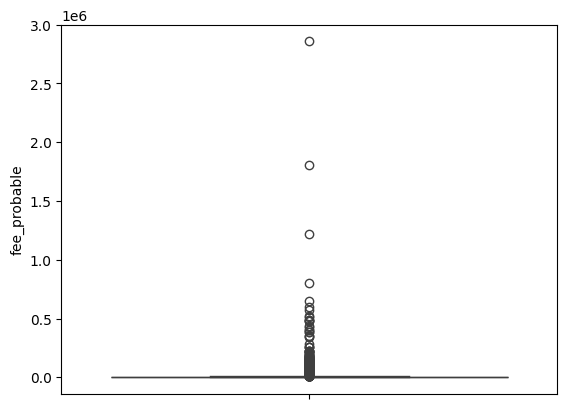

In [ ]:
sns.boxplot(prop['fee_probable'])
#definitely some outliers here

In [ ]:
threshold = prop['fee_probable'].quantile(0.995)
top_1_percent = prop[prop['fee_probable'] > threshold]
print(top_1_percent)
#These values look correct. They are consult/assessment project types for corporate accounts

       proposal_num registry_region         sow                  rfp  \
993   PCC-222615-00              Re         BCA                  NaN   
1331  PCC-224387-00              Re         BCA                  NaN   
1494  PCC-230125-00              Re         BCA                  NaN   
1548  PCC-230654-00              CA         BCA                  NaN   
1556  PCC-230486-00              TC         BCA                  NaN   
1594  PCC-230993-00              Ci         BCA           3447108958   
1605  PCC-231130-00              Fi         BCA      RFP - P-1077-22   
1607  PCC-230800-00              HS         BCA                  NaN   
2043  PCC-233766-00              Re  Renovation            2023-051P   
2157  PCC-234384-00              Co  Structural                  NaN   
2215  PCC-240403-00              Yo         BCA                  NaN   
2314  PCC-241008-00              Re     Roofing            2023-309P   
2448  PCC-241866-00              Ci         BCA  FIN-2023-03 P-3

storeys

<Axes: ylabel='storeys'>

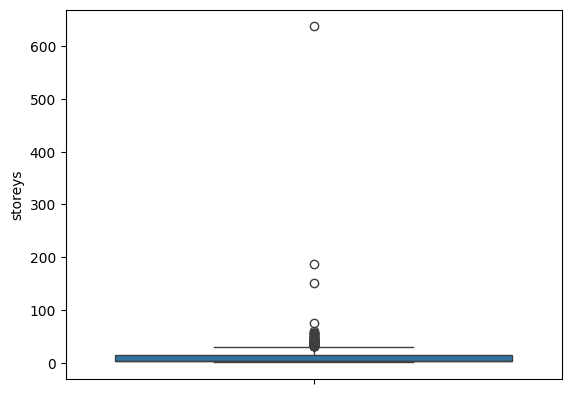

In [ ]:
sns.boxplot(prop['storeys'])
#Highest value looks like it might be an error

In [ ]:
print(prop[prop['storeys'] > 600])
#637 storeys looks to be an error based on the rest of the fields

    proposal_num registry_region         sow  rfp  units_orig storeys_orig  \
589      Q212767              TS  Update RFS  NaN  37 and 42           637   

    townhouse_orig parking_orig prev_rfp reminder  ...  outcome prev_wins  \
589              -            4      Yes       No  ...     loss         0   

    townhouse_flag  storeys  comm_flag  comm_units  potl_units  res_units  \
589              0    637.0          0         NaN         NaN        NaN   

     building_age  project_type  
589          17.0           RFS  

[1 rows x 22 columns]


In [ ]:
#Set storeys to 0 for index 5810
prop.loc[5810, 'storeys'] = 0

In [ ]:
print(prop[prop['storeys'] > 600])

    proposal_num registry_region         sow  rfp  units_orig storeys_orig  \
589      Q212767              TS  Update RFS  NaN  37 and 42           637   

    townhouse_orig parking_orig prev_rfp reminder  ...  outcome prev_wins  \
589              -            4      Yes       No  ...     loss       0.0   

    townhouse_flag  storeys  comm_flag  comm_units  potl_units  res_units  \
589            0.0    637.0        0.0         NaN         NaN        NaN   

     building_age  project_type  
589          17.0           RFS  

[1 rows x 22 columns]


comm_units

<Axes: ylabel='comm_units'>

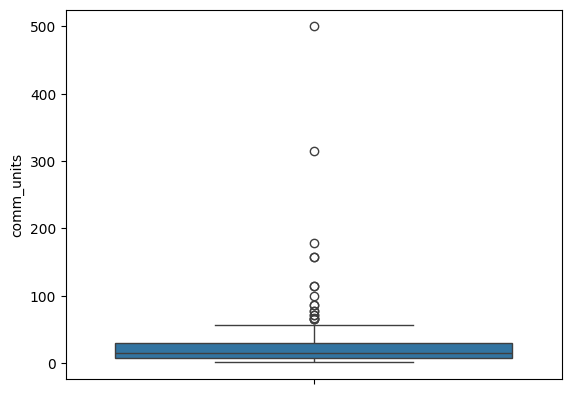

In [ ]:
sns.boxplot(prop['comm_units'])
#The highest two values are suspicious

In [ ]:
print(prop[prop['comm_units'] > 300])
#The 500 one is bc of my cleaning grabbing the wrong value fromthe word 'combine'. Will change it

       proposal_num registry_region          sow  rfp  \
464         Q210864              YC  Class 2 RFS  NaN   
1946  PCC-233242-00              Se          PCA  NaN   

                               units_orig                 storeys_orig  \
464                          315 Comm/Ind                            9   
1946  326 (5Bldgs)\n372,500 combine sqft.  5 elevators/bldg\n5 storeys   

     townhouse_orig parking_orig prev_rfp reminder  ...  outcome prev_wins  \
464               -            -       No      Yes  ...     loss       0.0   
1946              -            -       No       No  ...     loss       0.0   

     townhouse_flag  storeys  comm_flag  comm_units  potl_units  res_units  \
464             0.0      9.0        1.0       315.0         NaN        NaN   
1946            0.0      5.0        1.0       500.0         NaN        NaN   

      building_age  project_type  
464           45.0           RFS  
1946          40.0    Assessment  

[2 rows x 22 columns]


In [ ]:
prop.loc[12756, 'comm_units'] = 0
prop.loc[12756, 'comm_flag'] = np.nan

potl_units

<Axes: ylabel='potl_units'>

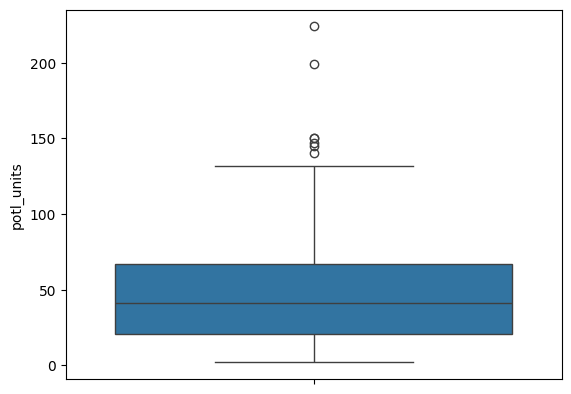

In [ ]:
sns.boxplot(prop['potl_units'])
#This one looks pretty good. I'll check the two high values just in case

In [ ]:
print(prop[prop['potl_units'] > 175])
#Confirmed I am grabbing the values correctly

       proposal_num registry_region          sow  rfp  units_orig  \
463         Q210861              PC  Class 2 RFS  NaN  199 POTL's   
2108  PCC-234291-00              TS  Class 2 RFS  NaN  224 POTL's   

     storeys_orig townhouse_orig parking_orig prev_rfp reminder  ...  outcome  \
463             -              -            -       No      Yes  ...     loss   
2108            -              -            -      Yes       No  ...      win   

     prev_wins townhouse_flag  storeys  comm_flag  comm_units  potl_units  \
463        0.0            0.0      NaN        0.0         NaN       199.0   
2108       1.0            0.0      NaN        0.0         NaN       224.0   

      res_units  building_age  project_type  
463         NaN          12.0           RFS  
2108        NaN          11.0           RFS  

[2 rows x 22 columns]


res_units

<Axes: ylabel='res_units'>

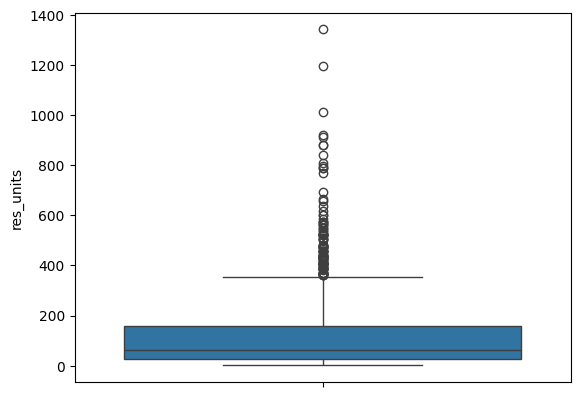

In [ ]:
sns.boxplot(prop['res_units'])
#This isn't very surprising, but I'll check the highest ones to be sure

In [ ]:
print(prop[prop['res_units'] > 1000])
#Given the storeys this looks correct

       proposal_num registry_region           sow  rfp units_orig  \
597         Q212795              TS  PA1, C1, PA2  NaN       1012   
1865  PCC-232807-00              TS   Class 2 RFS  NaN       1343   
2482  PCC-242097-00              TS       Consult  NaN       1195   

           storeys_orig townhouse_orig parking_orig prev_rfp reminder  ...  \
597                  49              -            4       No       No  ...   
1865           57 &  67              -            -       No       No  ...   
2482  25 (3 buildiings)              -            -       No       No  ...   

      outcome prev_wins townhouse_flag  storeys  comm_flag  comm_units  \
597      loss       0.0            0.0     49.0        0.0         NaN   
1865     loss       0.0            0.0      NaN        0.0         NaN   
2482      win       0.0            0.0      NaN        0.0         NaN   

      potl_units  res_units  building_age  project_type  
597          NaN     1012.0           0.0    Assessment

building_age

<Axes: ylabel='building_age'>

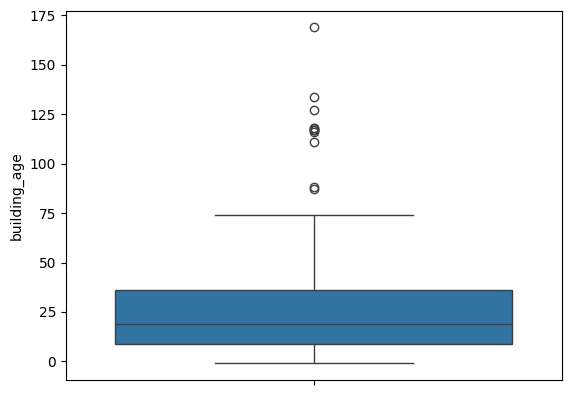

In [ ]:
sns.boxplot(prop['building_age'])
#Nothing surprising here

In [ ]:
print(prop[prop['building_age'] > 150])
#Confirmed this is correct

       proposal_num registry_region  sow  rfp            units_orig  \
1312  PCC-224529-00              Fu  BCA  NaN  Court House and Jail   

                              storeys_orig townhouse_orig parking_orig  \
1312  2-storey front & 3storey back (jail)            NaN          NaN   

     prev_rfp reminder  ...  outcome prev_wins townhouse_flag  storeys  \
1312       No       No  ...     loss       0.0            0.0      3.0   

      comm_flag  comm_units  potl_units  res_units  building_age  project_type  
1312        0.0         NaN         NaN        NaN         169.0    Assessment  

[1 rows x 22 columns]


# **Exporting Data**

In [ ]:
from google.colab import files
prop.to_csv('1.2 DW Output.csv')
files.download("1.2 DW Output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>